In [136]:
import pandas as pd

### Какой кейс решаем
Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель. 

### Название колонок:
1. hotel_address — адрес отеля;
2. review_date — дата, когда рецензент разместил соответствующий отзыв;
3. average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
4. hotel_name — название отеля;
5. reviewer_nationality — страна рецензента;
6. negative_review — отрицательный отзыв, который рецензент дал отелю;
7. review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
8. positive_review — положительный отзыв, который рецензент дал отелю;
9. review_total_positive_word_counts — общее количество слов в положительном отзыве.
10. reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
11. total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
12. total_number_of_reviews — общее количество действительных отзывов об отеле;
13. tags — теги, которые рецензент дал отелю;
14. days_since_review — количество дней между датой проверки и датой очистки;
15. additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
16. lat — географическая широта отеля;
17. lng — географическая долгота отеля.

In [137]:
#прочитаем наш датасет
df=pd.read_csv('./hotels.csv')

In [138]:
df.nunique()

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             225
negative_review                               248828
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               311737
review_total_positive_word_counts                354
total_number_of_reviews_reviewer_has_given       194
reviewer_score                                    37
tags                                           47135
days_since_review                                731
lat                                             1472
lng                                             1472
dtype: int64

In [139]:
df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [140]:
df['review_date'] = pd.to_datetime(df['review_date']) # преобразуем формат в дату
display(df['review_date'].min())
display(df['review_date'].max())

Timestamp('2015-08-04 00:00:00')

Timestamp('2017-08-03 00:00:00')

In [141]:
def rev_func(str_tags):
    str_tags = str_tags[2:-2]
    list_tags = str_tags.strip().split(' \', \' ')
    return list_tags
df['tags_n'] = df['tags'].apply(rev_func)
df = df.explode('tags_n')
len(df['tags_n'].unique())



2368

In [142]:
display(df['tags_n'].unique())

array(['Leisure trip', 'Couple', 'Studio Suite', ...,
       'Quadruple Room 2 Adults 2 Children', 'Art Deco Room Terrace',
       'Executive Double Room Non Smoking'], dtype=object)

In [143]:
df['tags_n'].value_counts

<bound method IndexOpsMixin.value_counts of 0                           Leisure trip
0                                 Couple
0                           Studio Suite
0                        Stayed 2 nights
0         Submitted from a mobile device
                       ...              
386801                   Stayed 2 nights
386802                      Leisure trip
386802                            Couple
386802                     Bunk Bed Room
386802                   Stayed 4 nights
Name: tags_n, Length: 1767522, dtype: object>

In [144]:
# Проанализируем теги

tags = df['tags'].value_counts(normalize=True)
df_tags = pd.DataFrame(data=tags)
df_tags.to_csv('tags.csv') # сохраним, чтобы просмотреть все теги

## Задание 2.1

В каких столбцах данные содержат пропущенные значения?

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   hotel_address                               object        
 1   additional_number_of_scoring                int64         
 2   review_date                                 datetime64[ns]
 3   average_score                               float64       
 4   hotel_name                                  object        
 5   reviewer_nationality                        object        
 6   negative_review                             object        
 7   review_total_negative_word_counts           int64         
 8   total_number_of_reviews                     int64         
 9   positive_review                             object        
 10  review_total_positive_word_counts           int64         
 11  total_number_of_reviews_reviewer_has_given  int64  

Вывод: пропущенные значения в 2-ч столбцах: lat и lng

### Задание 2.2

В каких столбцах данные хранятся в числовом формате?

Ответ: данные хранятся в числовом формате в следующих столбцах - additional_number_of_scoring , average_score,  review_total_negative_word_counts , total_number_of_reviews, review_total_positive_word_counts, total_number_of_reviews_reviewer_has_given, reviewer_score , lat, lng. Всего 9 столбцов.

### Задание 2.3

В каких столбцах данные представляют собой строки?

Ответ: данные представляют собой строки в следующих столбцах- hotel_address, hotel_name, review_nationality, negative_review, positive_review, tags, days_since_review. Всего 7 столбцов.

### Задание 2.4

Напишите признак, представляющий собой дату.

Ответ: review_date

In [146]:
#Модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in df.columns if df[s].dtypes == 'object']
df.drop(object_columns, axis = 1, inplace=True)

In [153]:
#Разделим признаки по типу, перечислим их:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

In [154]:
# заполняем пропуски самым простым способом
df= df.fillna(0)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767522 entries, 0 to 386802
Data columns (total 10 columns):
 #   Column                                      Dtype         
---  ------                                      -----         
 0   additional_number_of_scoring                int64         
 1   review_date                                 datetime64[ns]
 2   average_score                               float64       
 3   review_total_negative_word_counts           int64         
 4   total_number_of_reviews                     int64         
 5   review_total_positive_word_counts           int64         
 6   total_number_of_reviews_reviewer_has_given  int64         
 7   reviewer_score                              float64       
 8   lat                                         float64       
 9   lng                                         float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 148.3 MB


In [156]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = df.drop(['reviewer_score'], axis = 1)  
y = df['reviewer_score'] 

In [157]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [158]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [159]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели 
 
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)   

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)   

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
#Разделим признаки по типу, перечислим их:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

<AxesSubplot: >

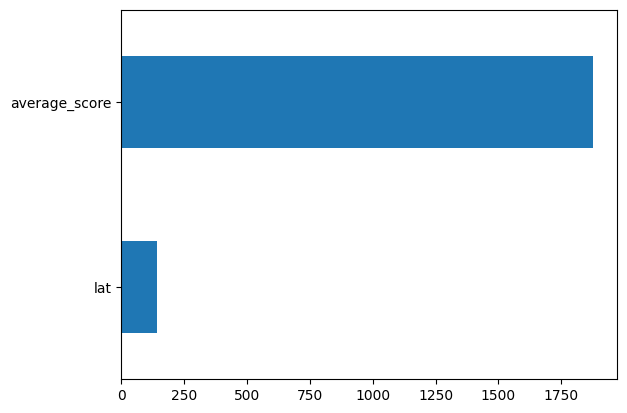

In [ ]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

<AxesSubplot: >

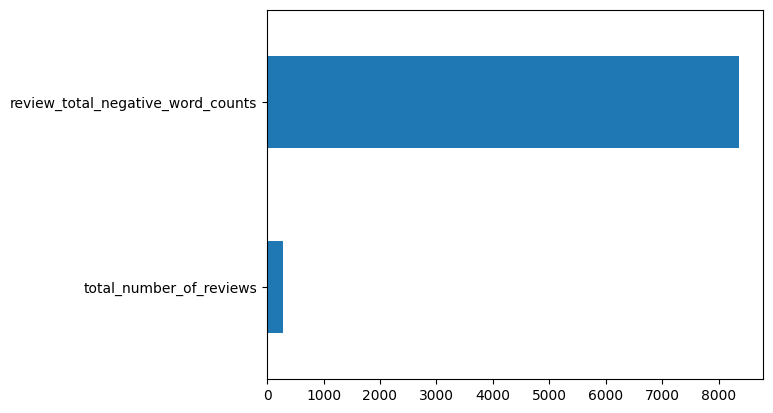

In [ ]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

По  графику важности категориальных переменных мы можем понять, что признак review_total_negative_word_counts важнее, чем total_number_of_reviews, в определении рейтинга отеля.

### Задание 4.2
Сколько уникальных названий отелей представлено в наборе данных?